In [1]:
from src.dataloader import create_dataloader
from src.loss import CustomCriterion
from src.model import Model
from src.trainer import TorchTrainer
from src.utils.common import get_label_counts, read_yaml
from src.utils.macs import calc_macs
from src.utils.torch_utils import check_runtime, model_info, seed_everything
import yaml

In [2]:
model_config = read_yaml("configs/model/example.yaml")
in_channel = 4
output_channel = 36
dummy_input = (in_channel,96,96)
model_config["input_channel"] = in_channel
print(model_config)
macs = []
moduel_names = []

{'input_channel': 4, 'depth_multiple': 1.0, 'width_multiple': 1.0, 'backbone': [[1, 'Conv', [6, 5, 1, 0]], [1, 'MaxPool', [2]], [1, 'Conv', [16, 5, 1, 0]], [1, 'MaxPool', [2]], [1, 'GlobalAvgPool', []], [1, 'Flatten', []], [1, 'Linear', [120, 'ReLU']], [1, 'Linear', [84, 'ReLU']], [1, 'Linear', [9]]]}


In [3]:
module_name1 = "Conv"
module_args1 = [output_channel, 3, 1, 0, 1, "ReLU"]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

conv_macs = calc_macs(model,dummy_input)
macs.append(conv_macs)
moduel_names.append(module_name1)
print(module_name1,conv_macs)

[[1, 'Conv', [36, 3, 1, 0, 1, 'ReLU']]]
Conv 14008320.0


In [4]:
module_name1 = "DWConv"
module_args1 = [output_channel, 3, 1, 0, "HardSwish"]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

dwconv_macs = calc_macs(model,dummy_input)
macs.append(dwconv_macs)
moduel_names.append(module_name1)
print(module_name1,dwconv_macs)

[[1, 'DWConv', [36, 3, 1, 0, 'HardSwish']]]
DWConv 4055040.0


In [5]:
module_name1 = "InvertedResidualv2"
expand_ratio = 3.0
module_args1 = [output_channel, expand_ratio, 1]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

invertedV2_macs = calc_macs(model,dummy_input)
macs.append(invertedV2_macs)
moduel_names.append(module_name1)
print(module_name1,invertedV2_macs)

[[1, 'InvertedResidualv2', [36, 3.0, 1]]]
InvertedResidualv2 7041024.0


In [6]:
module_name1 = "InvertedResidualv3"
expand_ratio = 3.0
module_args1 = [3, expand_ratio, output_channel, 0, 0, 1]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

invertedV3_macs = calc_macs(model,dummy_input)
macs.append(invertedV3_macs)
moduel_names.append(module_name1)
print("vanilla InvertedV3")
print(invertedV3_macs)

[[1, 'InvertedResidualv3', [3, 3.0, 36, 0, 0, 1]]]
vanilla InvertedV3
9142272.0


In [7]:
module_name1 = "InvertedResidualv3"
expand_ratio = 3.0
module_args1 = [3, expand_ratio, output_channel, 1, 0, 1]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

invertedV3_SE_macs = calc_macs(model,dummy_input)
macs.append(invertedV3_SE_macs)
moduel_names.append(module_name1+"_SE")
print("InvertedV3 with SE")
print(invertedV3_SE_macs)

[[1, 'InvertedResidualv3', [3, 3.0, 36, 1, 0, 1]]]
InvertedV3 with SE
9142552.0


In [8]:
module_name1 = "InvertedResidualv3"
expand_ratio = 3.0
module_args1 = [3, expand_ratio, output_channel, 0, 1, 1]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

invertedV3_HS_macs = calc_macs(model,dummy_input)
macs.append(invertedV3_HS_macs)
moduel_names.append(module_name1+"_HE")
print("InvertedV3 with HS")
print(invertedV3_HS_macs)

[[1, 'InvertedResidualv3', [3, 3.0, 36, 0, 1, 1]]]
InvertedV3 with HS
9142272.0


In [9]:
module_name1 = "InvertedResidualv3"
expand_ratio = 3.0
module_args1 = [3, expand_ratio, output_channel, 1, 1, 1]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

invertedV3_SE_HS_macs = calc_macs(model,dummy_input)
macs.append(invertedV3_SE_HS_macs)
moduel_names.append(module_name1+"_SE_HS")
print("InvertedV3 with SE, HS")
print(invertedV3_SE_HS_macs)

[[1, 'InvertedResidualv3', [3, 3.0, 36, 1, 1, 1]]]
InvertedV3 with SE, HS
9142552.0


In [10]:
module_name1 = "MBConv"
expand_ratio = 3
module_args1 = [expand_ratio, output_channel, 1, 3]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

MBConv_macs = calc_macs(model,dummy_input)
macs.append(MBConv_macs)
moduel_names.append(module_name1)
print(module_name1,MBConv_macs)

[[1, 'MBConv', [3, 36, 1, 3]]]
MBConv 7151653.0


In [11]:
module_name1 = "FusedMBConv"
expand_ratio = 3
module_args1 = [expand_ratio, output_channel, 1, 3]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

FusedMBConv_macs = calc_macs(model,dummy_input)
macs.append(FusedMBConv_macs)
moduel_names.append(module_name1)
print(module_name1,MBConv_macs)

[[1, 'FusedMBConv', [3, 36, 1, 3]]]
FusedMBConv 7151653.0


In [12]:
module_name1 = "ShuffleNetV2"
module_args1 = [48, 1]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)
ShuffleNetV2v_macs = calc_macs(model,dummy_input)
macs.append(ShuffleNetV2v_macs)
moduel_names.append(module_name1)
print(module_name1,ShuffleNetV2v_macs)

[[1, 'ShuffleNetV2', [48, 1]]]
ShuffleNetV2 350208.0


In [13]:
module_name1 = "AvgPool"
module_args1 = [2, 2, 0]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)
AvgPool_macs = calc_macs(model,dummy_input)
macs.append(AvgPool_macs)
moduel_names.append(module_name1)
print(module_name1,AvgPool_macs)

[[1, 'AvgPool', [2, 2, 0]]]
AvgPool 36864.0


In [14]:
module_name1 = "MaxPool"
module_args1 = [2, 2, 0]

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

MaxPool_macs = calc_macs(model,dummy_input)
macs.append(MaxPool_macs)
moduel_names.append(module_name1)
print(module_name1,AvgPool_macs)

[[1, 'MaxPool', [2, 2, 0]]]
MaxPool 36864.0


In [15]:
module_name1 = "GlobalAvgPool"
module_args1 = []

model_config["backbone"] = [[1,module_name1,module_args1]]
print(model_config["backbone"])
model = Model(model_config)

GlobalAvg_macs = calc_macs(model,dummy_input)
macs.append(GlobalAvg_macs)
moduel_names.append(module_name1)
print(module_name1,GlobalAvg_macs)

[[1, 'GlobalAvgPool', []]]
GlobalAvgPool 0.0


In [16]:
import matplotlib.pyplot as plt

In [17]:
index = list(range(len(macs)))
print(macs)
print(moduel_names)

[14008320.0, 4055040.0, 7041024.0, 9142272.0, 9142552.0, 9142272.0, 9142552.0, 7151653.0, 9363456.0, 350208.0, 36864.0, 36864.0, 0.0]
['Conv', 'DWConv', 'InvertedResidualv2', 'InvertedResidualv3', 'InvertedResidualv3_SE', 'InvertedResidualv3_HE', 'InvertedResidualv3_SE_HS', 'MBConv', 'FusedMBConv', 'ShuffleNetV2', 'AvgPool', 'MaxPool', 'GlobalAvgPool']


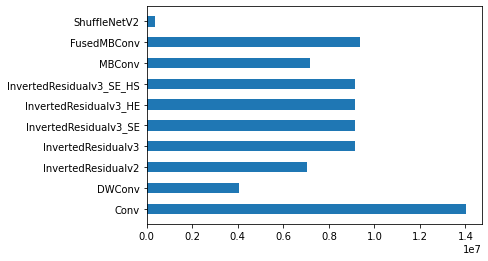

In [18]:
plt.barh(moduel_names[:-3],macs[:-3],height=0.5)
plt.show()

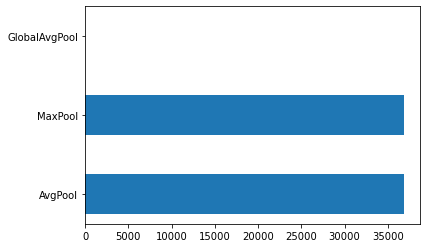

In [19]:
plt.barh(moduel_names[-3:],macs[-3:],height=0.5)
plt.show()